In [1]:
library(Seurat)
library(Signac)
library(magrittr)
library(genomation)
library(GenomicRanges)
library(Matrix)
library(ggplot2)

Loading required package: SeuratObject

Loading required package: sp

‘SeuratObject’ was built under R 4.3.2 but the current version is
4.3.3; it is recomended that you reinstall ‘SeuratObject’ as the ABI
for R may have changed

‘SeuratObject’ was built with package ‘Matrix’ 1.6.3 but the current
version is 1.6.5; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect


Loading required package: grid

Warning message:
“replacing previous import ‘Biostrings::pattern’ by ‘grid::pattern’ when loading ‘genomation’”
Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following object is masked from ‘package:SeuratObject’:

    intersect


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDupl

In [2]:
obj.seurat = readRDS("/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/data/PBMC/1.prepare_data/3.annotate_cell_type/obj.seurat.qc.56.rds")

In [3]:
table(obj.seurat$cell_type3)


        01_HSC 02_Early.Eryth    05_CMP.LMPP         07_GMP         09_pDC 
            15              6              3             51             93 
        10_cDC 11_CD14.Mono.1 12_CD14.Mono.2   13_CD16.Mono         14_Unk 
           333            461           2713            593           1224 
      16_Pre.B           17_B      18_Plasma       19_CD8.N      20_CD4.N1 
            27            882             48            146            773 
      22_CD4.M      24_CD8.CM          25_NK         26_Unk 
          8006           2129            757            149 

In [4]:
list.rna_detected_percent.9 = lapply(c("10_cDC","11_CD14.Mono.1","12_CD14.Mono.2","13_CD16.Mono","17_B",
                                       "20_CD4.N1","22_CD4.M","24_CD8.CM","25_NK"),
                                     function(cell_type) {
                                         matrix.rna = obj.seurat@assays$RNA$counts[,!is.na(obj.seurat$cell_type3) &
                                                                                   obj.seurat$cell_type3 == cell_type]
                                         rna_detected_percent = rowSums(matrix.rna) / ncol(matrix.rna)
                                         rna_detected_percent
                                     })

In [5]:
df.rna_detected_percent.9 = do.call(cbind,list.rna_detected_percent.9)
df.rna_detected_percent.9 = as.data.frame(df.rna_detected_percent.9)
colnames(df.rna_detected_percent.9) = c("10_cDC","11_CD14.Mono.1","12_CD14.Mono.2","13_CD16.Mono","17_B",
                                        "20_CD4.N1","22_CD4.M","24_CD8.CM","25_NK")

In [6]:
df.rna_detected_percent.9

,10_cDC,11_CD14.Mono.1,12_CD14.Mono.2,13_CD16.Mono,17_B,20_CD4.N1,22_CD4.M,24_CD8.CM,25_NK
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DDX11L2,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.0000000000,0.0000000000,0.000000000
DDX11L1,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.0000000000,0.0000000000,0.000000000
WASH7P,0.009009009,0.002169197,0.008477700,0.016863406,0.001133787,0.001293661,0.0046215338,0.0018788163,0.010568032
MIR6859-1,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.0000000000,0.0000000000,0.000000000
MIR1302-2HG,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.0000000000,0.0000000000,0.000000000
MIR1302-2,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.0000000000,0.0000000000,0.000000000
FAM138A,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.0000000000,0.0000000000,0.000000000
OR4G4P,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.0000000000,0.0000000000,0.000000000
ENSG00000290826,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.0000000000,0.0000000000,0.000000000


In [7]:
table(df.rna_detected_percent.9[,1] > 0.01)


FALSE  TRUE 
47100 15657 

In [8]:
df.rna_detected_percent.9.bi = df.rna_detected_percent.9 > 0.01
df.rna_detected_percent.9.bi

,10_cDC,11_CD14.Mono.1,12_CD14.Mono.2,13_CD16.Mono,17_B,20_CD4.N1,22_CD4.M,24_CD8.CM,25_NK
DDX11L2,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
DDX11L1,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
WASH7P,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE
MIR6859-1,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
MIR1302-2HG,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
MIR1302-2,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FAM138A,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
OR4G4P,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
ENSG00000290826,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
OR4G11P,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


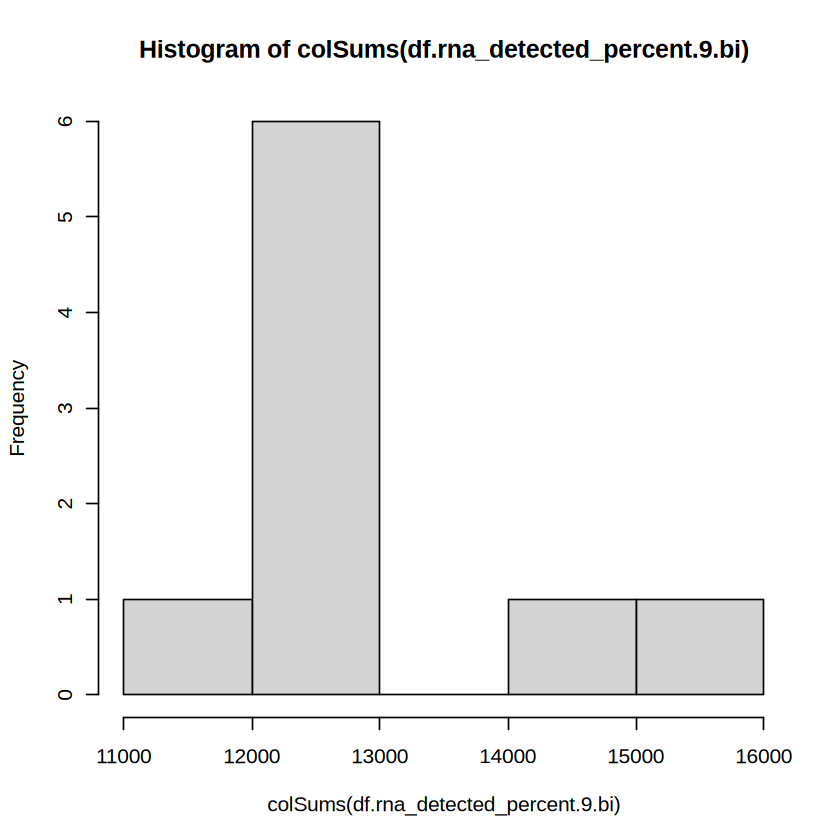

In [9]:
hist(colSums(df.rna_detected_percent.9.bi))

In [10]:
dir.create("/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/data/PBMC/1.prepare_data/4.1.define_detected_gene_peak.9_cell_types.240704",recursive = T)

In [11]:
write.csv(df.rna_detected_percent.9,
          "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/data/PBMC/1.prepare_data/4.1.define_detected_gene_peak.9_cell_types.240704/df.rna_detected_percent.9.csv")

In [12]:
write.csv(df.rna_detected_percent.9.bi,
          "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/data/PBMC/1.prepare_data/4.1.define_detected_gene_peak.9_cell_types.240704/df.rna_detected_percent.9.bi.csv")

In [13]:
dir.create("/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/data/PBMC/1.prepare_data/4.1.define_detected_gene_peak.9_cell_types.240704/peaks_PBMC",recursive = T)

In [14]:
for (cell_type in c("10_cDC","11_CD14.Mono.1","12_CD14.Mono.2","13_CD16.Mono","17_B",
                    "20_CD4.N1","22_CD4.M","24_CD8.CM","25_NK")) {
    bed.peaks = readGeneric(paste("/maps/projects/ralab_nnfc-AUDIT/people/lpm537/software/scE2G_pipeline/240617/sc-E2G/test/results/PBMC9/",
                                  cell_type,
                                  ".multiome_7features/Kendall/Pairs.tsv.gz",
                                  sep = ""),
                            header = T)
    bed.peaks = reduce(bed.peaks)

    write.table(as.data.frame(bed.peaks)[,1:3],
            paste("/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/data/PBMC/1.prepare_data/4.1.define_detected_gene_peak.9_cell_types.240704/peaks_PBMC/",
                  cell_type,
                  ".bed",
                  sep = ""),
            sep = "\t",
            row.names = F,
            col.names = F,
            quote = F)
}

In [15]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux 8.10 (Ootpa)

Matrix products: default
BLAS/LAPACK: /maps/projects/ralab/people/lpm537/software/anaconda3/envs/Notebook_E2G_240505/lib/libopenblasp-r0.3.27.so;  LAPACK version 3.12.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/Copenhagen
tzcode source: system (glibc)

attached base packages:
[1] stats4    grid      stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] ggplot2_3.5.1        Matrix_1.6-5         GenomicRanges_1.54.1
 [4] GenomeInfoDb_1.38.1  IRanges_2.36.0       S4Vectors_0.40.2   